# Анализ Университетов Мира (2023)
Я всех приветствую в очередной работе, где мы будет на примере датасета, содержащим данные по многим университетам мира, рассматривать университеты России и мира в целом, чтобы понять, куда,
возможно, стоит пойти учиться, если вдруг вы захотите целенаправленно изучать что-то для себя новое в разных странах и сферах в целом.

Данные я взял уже из готовой таблицы, собранно во время анализа в 2023 году, с сайта Kaggle.com.
Посмотреть и скачать данныые можно по ссылке: https://www.kaggle.com/datasets/tariqbashir/world-university-ranking-2023

---
## Описание датасета
```
World University Rankings 2023 is based upon 1,799 universities across 104 countries and regions based on many (at least 13) performance indicators that measure teaching, research, knowledge transfer, and international outlook. Data was collected from over 2,500 institutions, including survey responses from 40,000 scholars and analysis of over 121 million citations in 15.5 million research publications. The US has the most institutions overall and in the top 200, but China has overtaken Australia for the fourth-highest number of institutions in the top 200. The University of Oxford is ranked first for this year, while the highest new entry is Italy's Humanitas University.
```

---

Комментарий: Судя по данным, даже после обработки всех значений и к приведению их к нормальному виду получается >2000 (2345 rows если быть точным) университетов, поэтому фраза `based upon 1,799 universities` заставляет меня задуматься, где это я ошибаюсь в вычислениях
## Импорт необходимых библиотек Python


In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
db=pd.read_csv('dataset.csv',encoding='ISO-8859-1') # Без данного encoding параметра вылезет ошибка чтения файла
db

,Rank,Name,No. of FTE Students,No. of students per staff,International Students,Female:Male Ratio
0,NaN,Country/Region,NaN,NaN,NaN,NaN
1,Reporter,Zarqa University,"5,768",18.1,32%,47:53:00
2,NaN,Jordan,NaN,NaN,NaN,NaN
3,Reporter,Ziauddin University,"4,906",8.8,1%,63:37:00
4,NaN,Pakistan,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
4872,NaN,United Kingdom,NaN,NaN,NaN,NaN
4873,2,Harvard University,"21,887",9.6,25%,50:50:00
4874,NaN,United States,NaN,NaN,NaN,NaN
4875,1,University of Oxford,"20,965",10.6,42%,48:52:00


## Комментарий к датасету
Вы только посмотрите на это безумие! NaN Строки, в одном столбце находятся разные параметры, нужно срочно приводить всё к нормальному виду.

---
## Нормализация таблицы

In [114]:
db.drop(labels=0, inplace=True)
db.reset_index(inplace=True, drop=True)
def find_irregularity(db,full=False):
    ''' 
    Проверим, вся ли таблица имеет такой вид, или она неоднородна
    '''
    prev=-1
    sum=0
    for index, row in db.iterrows():
        # print(index,row['Rank'])
        if pd.isna(row['Rank']):
            if index-prev!=2:
                sum+=1
                if sum<3 or full==True: #Чтобы вывод не забивался поставил ограничение на вывод: sum<10
                    print('-------------------------')
                    print(f'Внимание, появилась неоднородность в данных')
                    for i in range(index-2,index+3):
                        print(i,db['Rank'].iloc[i],db['Name'].iloc[i], index-prev)
            prev=index
    print(f"---------------------\nКол-во неодноровностей:{sum}")
    if sum==0:
        print(f"Congrats, all clear!")
find_irregularity(db)

-------------------------
Внимание, появилась неоднородность в данных
38 Reporter Western Caspian University 1
39 nan Azerbaijan 1
40 nan Explore 1
41 Reporter ?Wellspring University 1
42 nan Nigeria 1
-------------------------
Внимание, появилась неоднородность в данных
67 Reporter National University of Uzbekistan named after Mirzo Ulugbek 1
68 nan Uzbekistan 1
69 nan Explore 1
70 Reporter University of Uyo 1
71 nan Nigeria 1
---------------------
Кол-во неодноровностей:186


## Вывод:
Как видите, тут есть неоднородность в данных. Помимо того, что в одном столбце находятся и название университетов, и их страны. Так еще есть некая строка Explore, которая меняет последовательность, не давая мне правильно и быстро переделать таблицу, не портя ее структуру.
Если внимательно изучить таблицу, то можно предположить, что строки Explore нам вообще не нужны, они ничего нам не дают от слова совсем. Уберем их отсюда.

In [115]:
db=db[db['Name']!='Explore']
db.reset_index(inplace=True, drop=True)
find_irregularity(db, full=True)

-------------------------
Внимание, появилась неоднородность в данных
2346 10011200 St Marianna University School of Medicine 1
2347 nan Japan 1
2348 nan Not accredited 1
2349 10011200 ?tefan cel Mare University of Suceava 1
2350 nan Romania 1
---------------------
Кол-во неодноровностей:1


Как видите, осталась только одна неоднородность, причем очень странная. Посмотрим на нее поближе

In [116]:
db.iloc[2345:2351]

,Rank,Name,No. of FTE Students,No. of students per staff,International Students,Female:Male Ratio
2345,NaN,United Kingdom,NaN,NaN,NaN,NaN
2346,10011200,St Marianna University School of Medicine,833,0.9,1%,39 : 61
2347,NaN,Japan,NaN,NaN,NaN,NaN
2348,NaN,Not accredited,NaN,NaN,NaN,NaN
2349,10011200,?tefan cel Mare University of Suceava,"9,239",24.8,14%,59:41:00
2350,NaN,Romania,NaN,NaN,NaN,NaN


Как видно, есть по сути пустая строка с ненаписанными данными тк университет, скорее всего, Не аккредитован.
> Unaccredited Universities is a list of colleges, universities, and other institutions that do not have the equivalent of regional academic accreditation. Some of these institutions may have legal authority to enroll students and grant degrees, but do not have regional academic accreditation for various reasons.

Найти не аккредитованные университеты можно по ссылке: https://www.scholaro.com/unaccredited-universities/

В нашем случае, просто избавимся от всех таких строк, если они есть (вроде одна только)

In [117]:
db=db[db['Name']!='Not accredited']
db.reset_index(inplace=True, drop=True)
find_irregularity(db, full=True) 

---------------------
Кол-во неодноровностей:0
Congrats, all clear!


In [118]:
countries=[]
indexes=[]
for index, row in db.iterrows():
    if index%2==1:
        countries.append(row['Name'])
        indexes.append(index)
db.drop(labels=indexes, inplace=True)
db.reset_index(inplace=True, drop=True)

In [119]:
db.insert(2,'Country',countries)
db

,Rank,Name,Country,No. of FTE Students,No. of students per staff,International Students,Female:Male Ratio
0,Reporter,Zarqa University,Jordan,"5,768",18.1,32%,47:53:00
1,Reporter,Ziauddin University,Pakistan,"4,906",8.8,1%,63:37:00
2,Reporter,Zhytomyr Polytechnic State University,Ukraine,"3,869",15.4,1%,34 : 66
3,Reporter,"Yusuf Maitama Sule University, Kano",Nigeria,"12,880",33.0,0%,48:52:00
4,Reporter,York St John University,United Kingdom,"6,315",18.6,12%,65:35:00
...,...,...,...,...,...,...,...
2340,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60
2341,3,Stanford University,United States,"16,164",7.1,24%,46:54:00
2342,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47:53:00
2343,2,Harvard University,United States,"21,887",9.6,25%,50:50:00


---
## Ошибки в тексте

Вы могли уже заметить, что некоторые значения выглядят немного странно. Давайте я вам перечислю, что нас не может устраивать в данных:

1. Данные из столбцов, к примеру No. of FTE Students написаны с запятой а не с точкой, поэтому числа не воспринимаются как числа. Давайте убедимся в этом, проверив тип данных у всех значений.

In [120]:
db.dtypes

Rank                          object
Name                          object
Country                       object
No. of FTE Students           object
No. of students per staff    float64
International Students        object
Female:Male Ratio             object
dtype: object

Как видите, только у столбца 'No. of students per staff' нет проблем (пока что). Давайте менять данные, приводя их к нормальному виду!

p.s. На самом деле, стоило бы руки оторвать тому человеку, который эти данные в таком виде собрал. Уж прогнать их через Power Query можно было бы, чтобы не было у нас уже проблем с обработкой.



In [121]:
db["No. of FTE Students"]=db["No. of FTE Students"].str.replace(',','.')
db["No. of FTE Students"]= db["No. of FTE Students"].astype(float)
print(db['No. of FTE Students'])

0        5.768
1        4.906
2        3.869
3       12.880
4        6.315
         ...  
2340    11.415
2341    16.164
2342    20.185
2343    21.887
2344    20.965
Name: No. of FTE Students, Length: 2345, dtype: float64


In [122]:
db[db["International Students"]==''] # We have 3 rows with missing values. lets just delete whem ahahah, i dont care about it cause im tired to put a median instead of them

,Rank,Name,Country,No. of FTE Students,No. of students per staff,International Students,Female:Male Ratio


In [123]:
db.drop(labels=[371,483,1471],inplace=True)
db.reset_index(inplace=True, drop=True)

In [124]:
db["International Students"]=db["International Students"].str.replace('%','')
db["International Students"]= db["International Students"].astype(float)
db["International Students"]= db["International Students"].apply(lambda x : x/100)
print(db['International Students'])

0       0.32
1       0.01
2       0.01
3       0.00
4       0.12
        ... 
2337    0.33
2338    0.24
2339    0.39
2340    0.25
2341    0.42
Name: International Students, Length: 2342, dtype: float64


In [125]:
db

,Rank,Name,Country,No. of FTE Students,No. of students per staff,International Students,Female:Male Ratio
0,Reporter,Zarqa University,Jordan,5.768,18.1,0.32,47:53:00
1,Reporter,Ziauddin University,Pakistan,4.906,8.8,0.01,63:37:00
2,Reporter,Zhytomyr Polytechnic State University,Ukraine,3.869,15.4,0.01,34 : 66
3,Reporter,"Yusuf Maitama Sule University, Kano",Nigeria,12.880,33.0,0.00,48:52:00
4,Reporter,York St John University,United Kingdom,6.315,18.6,0.12,65:35:00
...,...,...,...,...,...,...,...
2337,5,Massachusetts Institute of Technology,United States,11.415,8.2,0.33,40 : 60
2338,3,Stanford University,United States,16.164,7.1,0.24,46:54:00
2339,3,University of Cambridge,United Kingdom,20.185,11.3,0.39,47:53:00
2340,2,Harvard University,United States,21.887,9.6,0.25,50:50:00


## Female:Male Ratio
Посмотрите на столбец `Female:Male Ratio`. Будет лучше, если мы приведем это всё в порядок. Я проверил, null данных там нет, и все значения разбиваются на 3 варианта:
1. a:b
2. a:b:c
3. d, где d=a/b

Нам же для оценки стоит как раз в численном формате все эти варианты представить, то есть в 3-ем.

In [126]:
null_index=list(db[db['Female:Male Ratio'].isnull()].index) #make a point on every null index
# print(null_index)
for index, row in db.iterrows():
    ratio=db['Female:Male Ratio'][index]
    if index not in (null_index):
        ratio=ratio.replace(' ','')
        ratio=ratio.split(':')
        if len(ratio)==3:
            ratio.pop(-1)
        if len(ratio)==2:
            a=int(ratio[0])
            b=int(ratio[1])
            if b!=0:
                ratio[0]=float(a/b)
            else:
                ratio[0]=100.
            ratio.pop(-1)
        ratio=float(ratio[0])
        db.loc[index,'Female:Male Ratio']=ratio
        # print(ratio)
db['Female:Male Ratio'] = db['Female:Male Ratio'].fillna(db['Female:Male Ratio'].mean())


---
## Столбец Rank
Давайте теперь перейдем к столбцу Rank.
Для начала посмотрим, какие уникальные значения в нем присутствуют.

In [127]:
print(set(db['Rank']))

{'36', '154', '111', '22', '61', '46', '156', '51', '1201\x961500', '351\x96400', '85', '65', '23', '67', '107', '48', '301\x96350', '93', '130', '170', '175', '139', '131', '128', '26', '86', '3', '174', '163', '57', '135', '63', '98', '24', '59', '133', '144', '31', '1', '19', '176', '15', '186', '168', '147', '104', '122', '81', '77', '181', '28', '187', '185', '151', '44', '43', '119', '41', '20', '47', '161', '18', '89', '5', '6', '68', '95', '38', '182', '88', '82', '118', '401\x96500', '148', '75', '40', '8', '146', '501\x96600', '179', '16', '201\x96250', '183', '251\x96300', '155', '64', '192', '33', '91', '113', '62', '10', '17', '112', '127', '198', '99', '71', '78', '106', '66', '69', '189', '29', '11', '56', '49', '108', '45', '39', '123', 'Reporter', '136', '160', '1001\x961200', '14', '58', '101', '60', '145', '126', '32', '54', '73', '9', '601\x96800', '90', '34', '30', '7', '80', '124', '137', '52', '180', '173', '76', '13', '42', '53', '2', '1501+', '37', '21', '194',

Нас смущают надписи вида:
1. 1501+
2. 601\x96800
3. Reporter

И большая проблема в том, что именно ставить вместо этих значений. 
- Допустим, все значения вида `601\x96800` мы будем сортировать случайным образом (сортировать по тем данным, которые у нас имеются, не имеет смысла так как результаты всё равно не окажутся верными). 
- Допустим, все значения вида `1501+` будут также случайным образом расставлены , всё равно большой роли это не сыграет, на каком месте будет стоять университет, в топ 1500 или в топ 3000. В среднем все останутся довольны.
- В связи с тем, что значение `Reporter` не объяснено, то единственное, что можно предположить, что это те университеты, которым либо поставить Rank не удалось, либо по какой-то причине это значение было потеряно. Давайте проверим, так ли это, заодно исправим остальные значения.
- Однако можно заметить, что все значения будто бы изначально идут в порядке убывания, то есть в конце стоит университет под номером 1, а в начале тогда будет стоять последний университет в топе. Попробуем просто заменить значения на уникальные.


In [128]:
size=len(db.index)

index_report=list(db[db['Rank']=='Reporter'].index) # That will help us soon.

for i in range(size):
    db.loc[i,'Rank']=size-i

db['Rank']=db['Rank'].astype(int)
print(db['Rank'])

0       2342
1       2341
2       2340
3       2339
4       2338
        ... 
2337       5
2338       4
2339       3
2340       2
2341       1
Name: Rank, Length: 2342, dtype: int32


In [129]:
print(db.dtypes) #Cool! Lets analyze then

Rank                           int32
Name                          object
Country                       object
No. of FTE Students          float64
No. of students per staff    float64
International Students       float64
Female:Male Ratio            float64
dtype: object


In [130]:
print(db.isnull().any()) # Checked miss data, but all is fine.

Rank                         False
Name                         False
Country                      False
No. of FTE Students          False
No. of students per staff    False
International Students       False
Female:Male Ratio            False
dtype: bool


<AxesSubplot: >

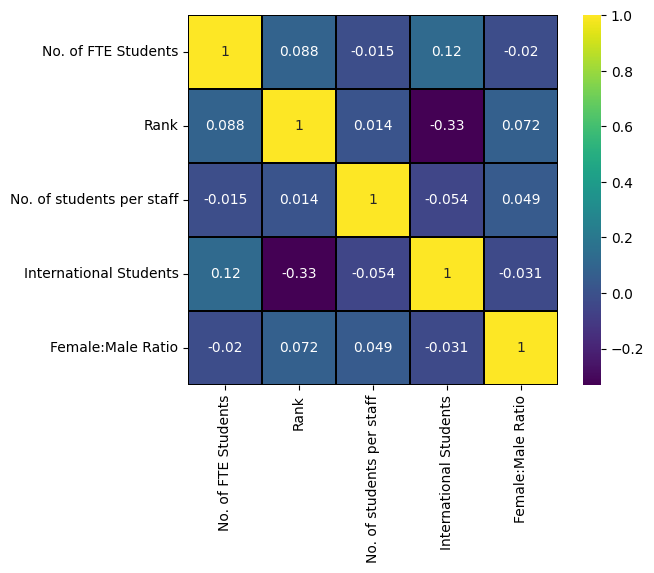

In [131]:
sns.heatmap(db[['No. of FTE Students','Rank','No. of students per staff','International Students','Female:Male Ratio']].corr(),linewidths=0.25,vmax=1.0, square=True, cmap="viridis", linecolor='k', annot=True)

Text(0.5, 1.0, 'The dependence of the Place in the top university and on the percentage of Foreign students')

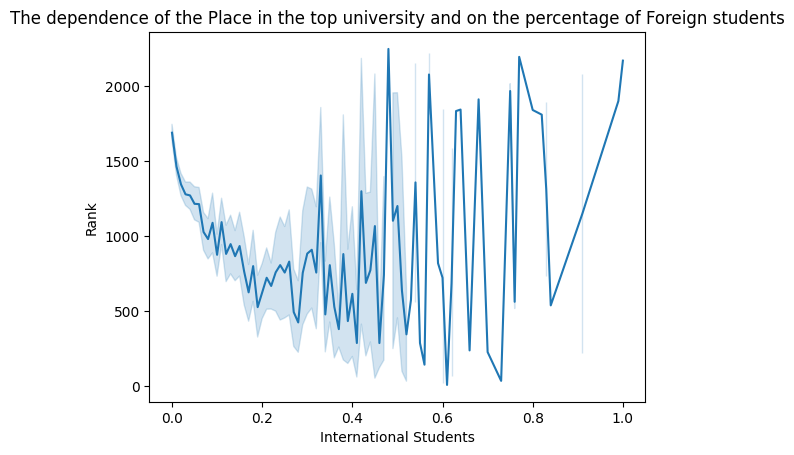

In [132]:
plot=sns.lineplot(x="International Students", y="Rank",data=db)
# plot.set(yscale='log')
plot.set_title('The dependence of the Place in the top university and on the percentage of Foreign students')

Такой больше разброс связан как раз с тем, что слово `Reporter`, которое автоматически теперь ставится к конец по рангу, на самом же деле они должны быть ближе к первому месту, как я понял. Давайте тогда изменим нашу программу таким образом, чтобы она сама предугадала место в топе у университетов, у которых стоит слово 'Reporter'. 

In [133]:
print(index_report)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

---
## Начало моделирования

Посмотрим, изменится ли сильно график, если мы уберем временно значения `Reporter` из датасета

Text(0.5, 1.0, 'The dependence of the Place in the top university and on the percentage of Foreign students')

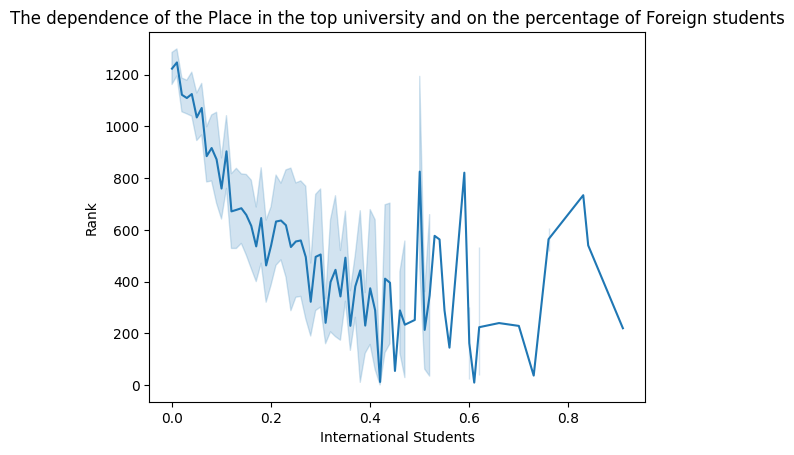

In [134]:
plot=sns.lineplot(x="International Students", y="Rank",data=db[db['Rank']<1800])
# plot.set(yscale='log')
plot.set_title('The dependence of the Place in the top university and on the percentage of Foreign students')